<a href="https://colab.research.google.com/github/BrianM50/MAT-421/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

**Section 17.4(Lagrange Polynomial Interpolation)**

A single polynomial that goes through all the data points can be found using Lagrange polynomial interpolation. The polynomial it finds is called the Lagrange polynomial, L(x). Since it is an interpolation function, it has the property L(x(i)) = y(i), for every point in the dataset.

A linear combination of Lagrange basis polynomials, 𝑃𝑖(𝑥), is useful for computing lagrange polynomials.

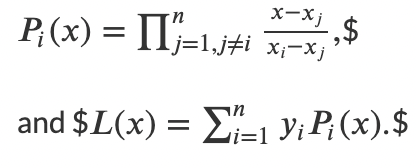

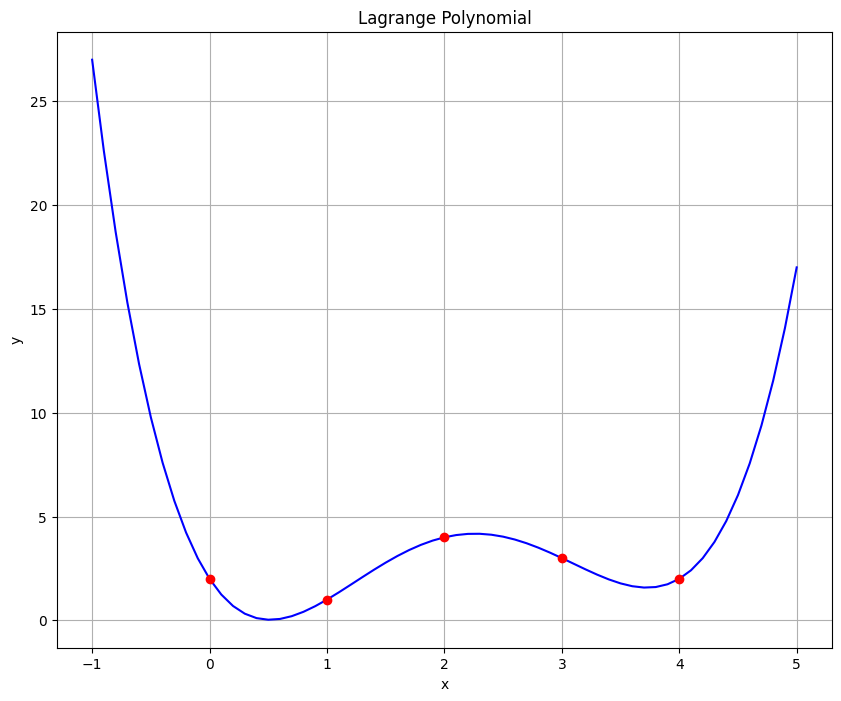

In [ ]:
#Graphing the Lagrange Polynomial using lagrange from scipy
x = [0, 1, 2, 3, 4]
y = [2, 1, 4, 3, 2]
f = lagrange(x, y)
x_new = np.arange(-1.0, 5.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Section 17.5(Newton’s Polynomial Interpolation)**

Another way to fit exactly for a set of data points is Newton's polynomial interpolation.

The general form of the an 𝑛−1 order Newton’s polynomial that goes through 𝑛 points is:

f(x) = a(0)+a(1)(x-x(0))+a(2)(x-x(0))(x-x(1))+ ... +a(n)(x-x(0))(x-x(1))...(x-x(n))

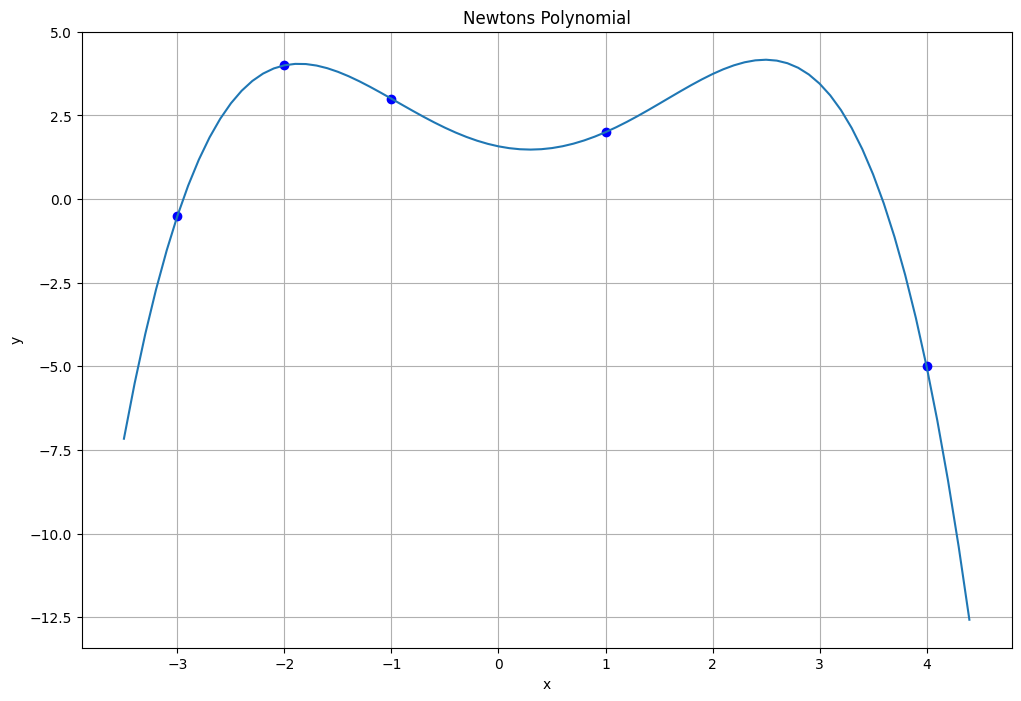

In [ ]:
#Calculate the divided differences table for x = [4, -3, 1, -2], y = [-5, -.5, 2, 4].

#function to calculate the divided differences table
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    #the first column is y
    coef[:,0] = y

    for j in range(1,n):
      for i in range(n-j):
        coef[i][j] = \
        (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

#evaluate the newton polynomial at x
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

x = np.array([4, -3, 1, -2, -1])
y = np.array([-5, -.5, 2, 4, 3])

a_s = divided_diff(x, y)[0, :]
x_new = np.arange(-3.5, 4.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title('Newtons Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
